In [92]:
import pandas as pd

In [93]:
df = pd.read_csv(r"C:\Users\91807\OneDrive\Desktop\Data science\Projects\GIT\BCG_GEN_AI\BCG_X_GEN_AI\TASK_1\Task_1_data_Extraction_Initial_analysis.csv",sep=",", skiprows=2)

In [94]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [95]:
df.columns = ['Company_Name', 'Year', 'Total_Revenue', 'Net_Income', 'Total_Assets','Total_Liabilities', 'Operating_Cash_Flow']

In [96]:
print(df.columns.tolist())

['Company_Name', 'Year', 'Total_Revenue', 'Net_Income', 'Total_Assets', 'Total_Liabilities', 'Operating_Cash_Flow']


In [97]:
# Sort before group operations
df=df.sort_values(['Company_Name', 'Year'])

In [98]:
#calculating year-over-year changes for each financial metric
df['Revenue_Growth(%)']= df.groupby('Company_Name')['Total_Revenue'].pct_change() * 100
df['Net_Income_Growth(%)'] = df.groupby('Company_Name')['Net_Income'].pct_change() * 100
df['Assets_Growth(%)'] = df.groupby('Company_Name')['Total_Assets'].pct_change() * 100
df['Operating_Cash_Flow_Growth(%)'] = df.groupby('Company_Name')['Operating_Cash_Flow'].pct_change() * 100


In [99]:
# Average YoY growth by company
summary = df.groupby('Company_Name')[['Revenue_Growth(%)',
                                 'Net_Income_Growth(%)',
                                 'Assets_Growth(%)',
                                 'Operating_Cash_Flow_Growth(%)']].mean().round(2)
df.fillna({'Revenue_Growth(%)': 0,
           'Net_Income_Growth(%)': 0,
           'Assets_Growth(%)': 0,
           'Operating_Cash_Flow_Growth(%)': 0}, inplace=True)

In [100]:
print(summary)

              Revenue_Growth(%)  Net_Income_Growth(%)  Assets_Growth(%)  \
Company_Name                                                              
Apple                      2.39                 -0.90              3.54   
Microsoft                 15.30                 18.67              5.71   
Tesla                      0.24                  1.22              4.08   

              Operating_Cash_Flow_Growth(%)  
Company_Name                                 
Apple                                  4.65  
Microsoft                             25.11  
Tesla                                  0.08  


In [102]:
import matplotlib.pyplot as plt

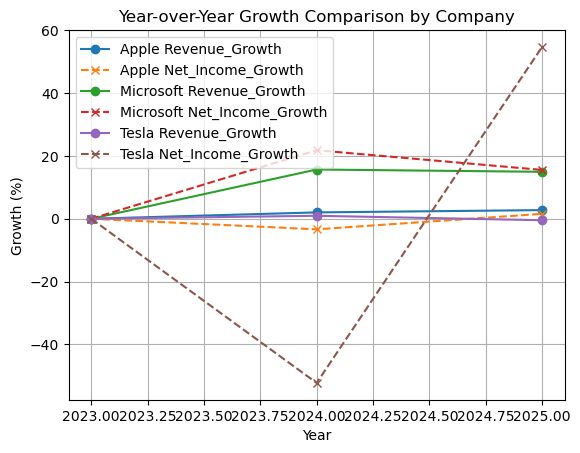

In [111]:
for company in df['Company_Name'].unique():
    subset = df[df['Company_Name'] == company]  # use lowercase 'company' here
    plt.plot(subset['Year'], subset['Revenue_Growth(%)'], marker='o', label=f"{company} Revenue_Growth")
    plt.plot(subset['Year'], subset['Net_Income_Growth(%)'], marker='x', linestyle='--', label=f"{company} Net_Income_Growth")

plt.title("Year-over-Year Growth Comparison by Company")
plt.xlabel("Year")
plt.ylabel("Growth (%)")
plt.legend()
plt.grid(True)
plt.show()


In [114]:
''' Summary Finding:
(A)Apple:

1. Revenue is  2.39% which is slightly positive, showing steady low growth. Looks like the Apple market is stagnating and would show some change when new services or innovations are introduced.
2. Net income growth is -0.9% which is slightly negative, possibly due to increased component costs, R&D, or a shift in product mix.
3. Assets are 3.54% which shows the modest reinvestment shows steady infrastructure expansion and equipment renewal.
4. Operating cash flow is 4.65% showing great continuous operations and generating strong cash backing up revenue stability.
Final Takeaways are that Apple looks to have good financial stability and steady cash flow, and asset discipline maintains resilience even with slow top-line growth.

(B)Microsoft:

1. Revenue is  15.3%, which is highly positive for mega cap, likely driven due to cloud platforms like Azure, AI integrations, and enterprise software.
2. Net income growth is 18.67% which also shows that the company has a high revenue growth with high-margin services.
3. Assets are 5.71% which shows the great balanced reinvestment with scaling the cloud  infrastructure expansion and equipment renewal.
4. Operating cash flow is 25.11% showing great continuous operations and generating strong cash leverage from software and subscription models.
Final Takeaways are that Microsoft is the benchmark for the high-margin, rich cash growth, expanding both top-line and bottom-line with scalable cloud/AI operations.

(C)Tesla:

1. Revenue is  0.24%, which is almost flat, indicating price cut off offsetting sales volume increase.
2. Net income growth is 1.22% which also shows that the company has barely improved and indicates the risk of rising costs or tighter margins.
3. Assets are 4.08% which shows the  balanced reinvestment in  factories, R&D despite lower growth.
4. Operating cash flow is 0.08%, nearing to zero which shows cash generation from operations stagnated, likely due to cost of production, R&D intensity, or working-capital pressures.
Final Takeaways are Tesla’s rapid expansion phase is cooling; it’s now entering a stabilization phase with focus needed on cost optimization.


'''

' Summary Finding:\n(A)Apple:\n\n1. Revenue is  2.39% which is slightly positive, showing steady low growth. Looks like the Apple market is stagnating and would show some change when new services or innovations are introduced.\n2. Net income growth is -0.9% which is slightly negative, possibly due to increased component costs, R&D, or a shift in product mix.\n3. Assets are 3.54% which shows the modest reinvestment shows steady infrastructure expansion and equipment renewal.\n4. Operating cash flow is 4.65% showing great continuous operations and generating strong cash backing up revenue stability.\nFinal Takeaways are that Apple looks to have good financial stability and steady cash flow, and asset discipline maintains resilience even with slow top-line growth.\n\n(B)Microsoft:\n\n1. Revenue is  15.3%, which is highly positive for mega cap, likely driven due to cloud platforms like Azure, AI integrations, and enterprise software.\n2. Net income growth is 18.67% which also shows that th